In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

10/31/2018 14:58:06 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/31/2018 14:58:07 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/31/2018 14:58:09 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

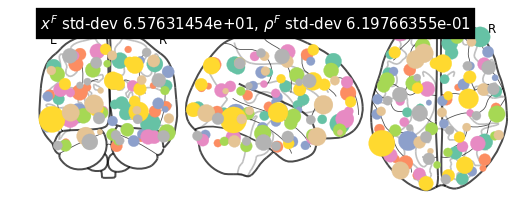

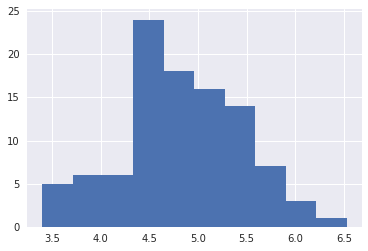

(<nilearn.plotting.displays.OrthoProjector at 0x7fae3e667898>,
 tensor([[-57.4616, -52.9950,  45.3410],
         [  6.7899,   9.9231,   5.3718],
         [-32.5119, -24.9636,  -5.9807],
         [ 18.3546, -67.5776,  -4.2124],
         [ 48.9530, -56.0713,  47.9135],
         [-52.2625,  16.0632,  11.1652],
         [ 44.1928,  54.4041, -14.4173],
         [-50.2279,  35.8567,  -9.6777],
         [ 25.3984, -94.6746,   2.6021],
         [ 61.0260,  -2.8488,  25.0983],
         [-18.8767, -20.4767,  39.7335],
         [ 14.1784,  37.7116,   6.9025],
         [ 12.2267,  47.7019,  51.4559],
         [  8.7447, -11.3747, -38.4428],
         [ 20.8817,   1.2911,  63.2015],
         [-44.7586, -73.9454, -34.7296],
         [ 60.8349, -20.2606,   3.5536],
         [-34.1379, -78.0647,  47.9070],
         [-30.0306,  63.1017,  18.0073],
         [ 47.1938, -83.8069,  25.2158],
         [-61.7053, -42.6110,  15.6467],
         [-22.4411, -91.1811,  23.4296],
         [ 34.3254, -26.0207, -30.7

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.average_reconstruction_error()

10/31/2018 15:00:02 Average reconstruction error (MSE): 1.12604096e+00
10/31/2018 15:00:02 Average data norm (Euclidean): 9.92958209e-01
10/31/2018 15:00:02 Percent average reconstruction error: 0.383604


(1.1260409638065918, 0.992958209255918, 0.003836042343792877)

In [9]:
losses = dtfa.train(num_steps=5000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=8, patience=500)

10/31/2018 15:00:03 [Epoch 1] (709ms) Posterior free-energy 1.44977312e+08 = KL from prior 2.26997681e+03 - log-likelihood -1.44975040e+08
10/31/2018 15:00:04 [Epoch 2] (692ms) Posterior free-energy 1.46079824e+08 = KL from prior 2.76095068e+03 - log-likelihood -1.46077056e+08
10/31/2018 15:00:04 [Epoch 3] (629ms) Posterior free-energy 1.45563504e+08 = KL from prior 2.19833545e+03 - log-likelihood -1.45561312e+08
10/31/2018 15:00:05 [Epoch 4] (633ms) Posterior free-energy 1.42389600e+08 = KL from prior 7.97058789e+03 - log-likelihood -1.42381632e+08
10/31/2018 15:00:06 [Epoch 5] (679ms) Posterior free-energy 1.41354112e+08 = KL from prior 1.24788652e+04 - log-likelihood -1.41341632e+08
10/31/2018 15:00:06 [Epoch 6] (621ms) Posterior free-energy 1.41532720e+08 = KL from prior 1.23958477e+04 - log-likelihood -1.41520320e+08
10/31/2018 15:00:07 [Epoch 7] (709ms) Posterior free-energy 1.39106960e+08 = KL from prior 2.83482031e+04 - log-likelihood -1.39078608e+08
10/31/2018 15:00:08 [Epoch 

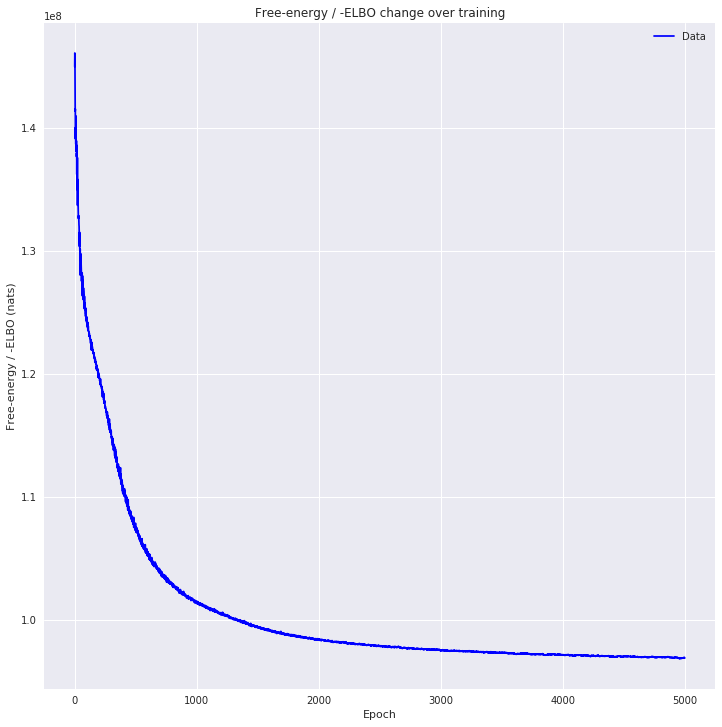

In [10]:
utils.plot_losses(losses)

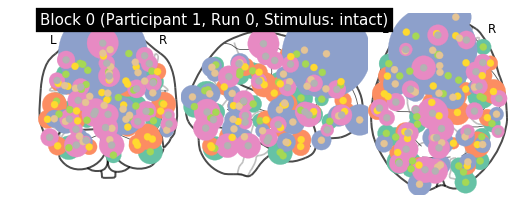

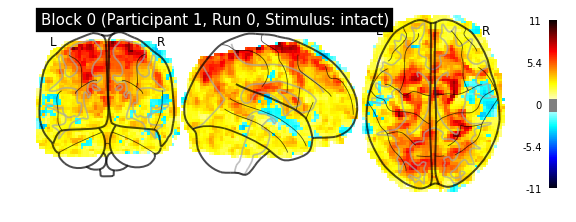

10/31/2018 15:54:47 Reconstruction Error (Frobenius Norm): 4.10412256e+03 out of 5.08479883e+03


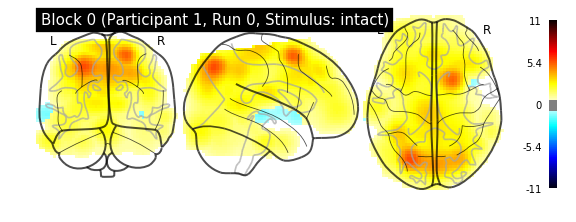

{'weights': tensor([[ 1.0462e+00,  2.6550e+00,  3.4912e-01,  ...,  1.5329e+00,
         -2.3215e+00,  1.9377e+00],
        [ 8.9311e-01,  1.3041e+00, -1.3759e+00,  ...,  8.0671e-01,
         -2.2294e+00,  1.6756e+00],
        [ 1.5605e+00,  8.4033e-01, -4.9045e-01,  ..., -4.8928e-02,
         -1.8385e+00,  1.1404e+00],
        ...,
        [-9.3004e-01, -8.2788e-01, -7.1840e-02,  ...,  4.2716e-01,
         -3.4600e-01,  8.7051e-01],
        [ 1.1191e-03, -1.2464e+00, -2.5137e-01,  ...,  2.8054e-01,
          1.9090e+00,  5.6813e-01],
        [ 5.6192e-01, -1.7358e+00,  3.1967e-01,  ...,  1.5289e+00,
          4.0097e+00, -1.0511e-01]]), 'factors': tensor([[ 0.0002,  0.0001,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

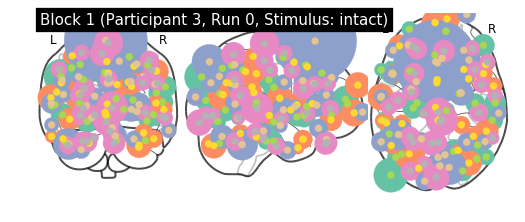

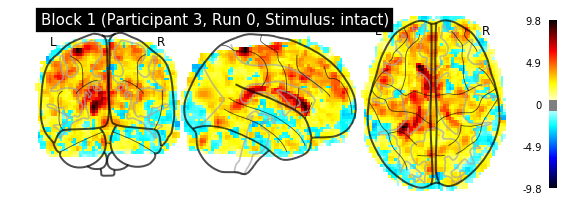

10/31/2018 15:55:14 Reconstruction Error (Frobenius Norm): 4.26732324e+03 out of 5.19534326e+03


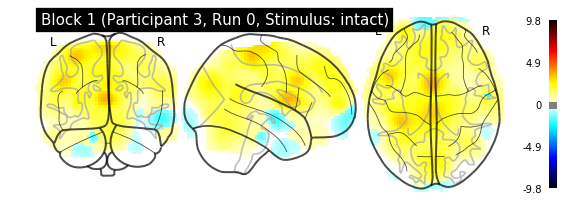

{'weights': tensor([[-1.5222e+00, -4.0254e+00,  3.0499e-01,  ...,  4.5660e-01,
          1.5877e+00, -3.7458e-01],
        [-2.6764e+00, -1.5778e+00, -2.5420e-01,  ..., -6.3643e-01,
          2.9705e-02,  1.5635e-01],
        [-1.4423e+00,  3.8223e-01, -8.2532e-01,  ..., -8.6358e-02,
          2.4503e-01,  6.5558e-01],
        ...,
        [ 1.6855e+00,  1.1056e+00,  3.3086e-01,  ...,  5.4853e-01,
          1.2663e+00, -1.8047e+00],
        [ 1.9175e+00,  6.5023e-01,  1.4990e-01,  ..., -6.3274e-01,
          2.5045e+00, -2.0512e+00],
        [ 1.4032e+00,  2.3555e+00, -1.1254e+00,  ..., -7.5377e-01,
          2.6525e+00, -1.9916e+00]]), 'factors': tensor([[ 0.0013,  0.0005,  0.0007,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0001,  0.0002,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

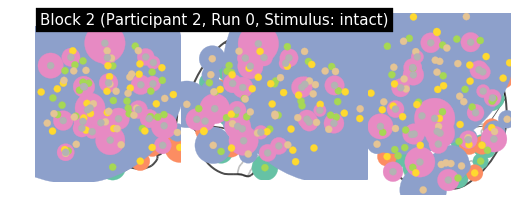

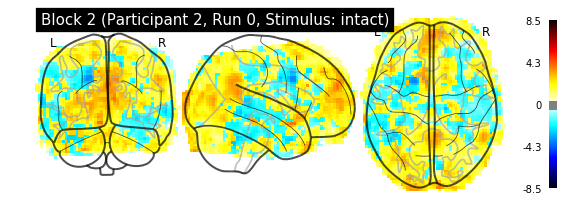

10/31/2018 15:55:41 Reconstruction Error (Frobenius Norm): 3.98982593e+03 out of 5.19534229e+03


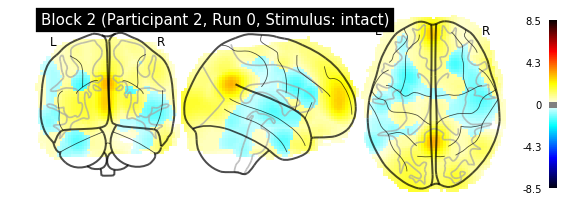

{'weights': tensor([[-0.4050,  1.3114,  0.1082,  ..., -0.3420,  0.6122, -2.0957],
        [-1.9254,  0.3478, -0.1105,  ..., -1.5948,  0.1461, -0.6000],
        [-4.9691, -0.2045, -0.4587,  ..., -0.7143,  0.5029, -0.4027],
        ...,
        [-1.1005,  0.0237, -0.2913,  ..., -0.1669, -0.1337,  0.1051],
        [ 0.9110, -0.7949, -0.2641,  ...,  0.0517, -0.2451, -1.1425],
        [ 2.9770, -1.1651, -0.9497,  ..., -0.3112, -1.4384, -1.3517]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0003,  0.0005,  0.0004,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ -45.5341,  -64.2593,   40.7766],
        [   5.2577,   13.4985,    9.4460],
   

In [11]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [12]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


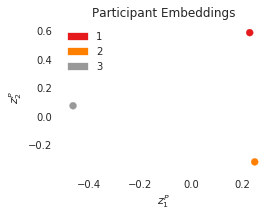

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


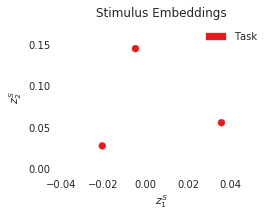

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

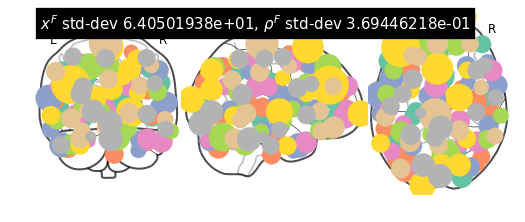

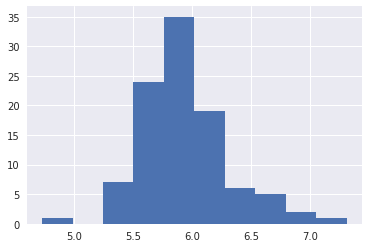

(<nilearn.plotting.displays.OrthoProjector at 0x7fadef4496a0>,
 tensor([[ -47.3510,  -54.2096,   40.1056],
         [   4.9856,   12.1483,    4.9790],
         [ -26.4112,  -29.4245,  -10.2212],
         [  19.8666,  -67.5527,   -4.1402],
         [  44.8012,  -56.4953,   42.4745],
         [ -49.6233,   15.9072,    2.7096],
         [  46.3317,   46.7223,   -8.4817],
         [ -51.0377,   29.1654,   -5.3044],
         [  25.1177,  -93.1787,    5.2479],
         [  54.6608,  -12.7631,   28.1925],
         [ -22.9886,  -24.1038,   33.5631],
         [   9.3116,   49.1983,   10.5757],
         [   0.5724,   39.1754,   41.5629],
         [   6.1770,  -17.4995,  -46.9823],
         [  24.1715,    0.9023,   60.3651],
         [ -42.7053,  -73.2875,  -39.5685],
         [  57.2813,  -26.8161,    2.9813],
         [ -33.4706,  -69.1472,   46.2548],
         [ -28.1126,   56.9273,   17.8665],
         [  40.8287,  -78.7225,   19.1736],
         [ -56.2494,  -42.3038,    8.8227],
         [ -3

In [15]:
dtfa.visualize_factor_embedding()

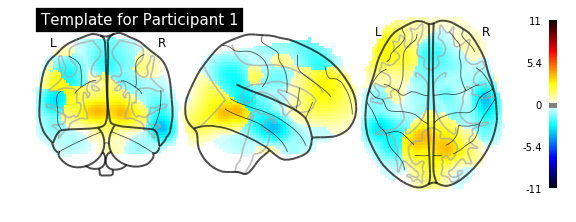

In [16]:
dtfa.plot_subject_template(1)

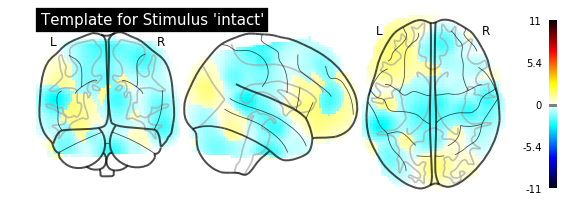

In [17]:
dtfa.plot_task_template('intact')

In [18]:
dtfa.average_reconstruction_error()

10/31/2018 15:56:09 Average reconstruction error (MSE): 7.93592678e-01
10/31/2018 15:56:09 Average data norm (Euclidean): 9.92958209e-01
10/31/2018 15:56:09 Percent average reconstruction error: 0.271229


(0.7935926781911109, 0.992958209255918, 0.0027122918828337197)